In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow --quiet

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [ ]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [ ]:
# Read in the Platinum dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Platinum_Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

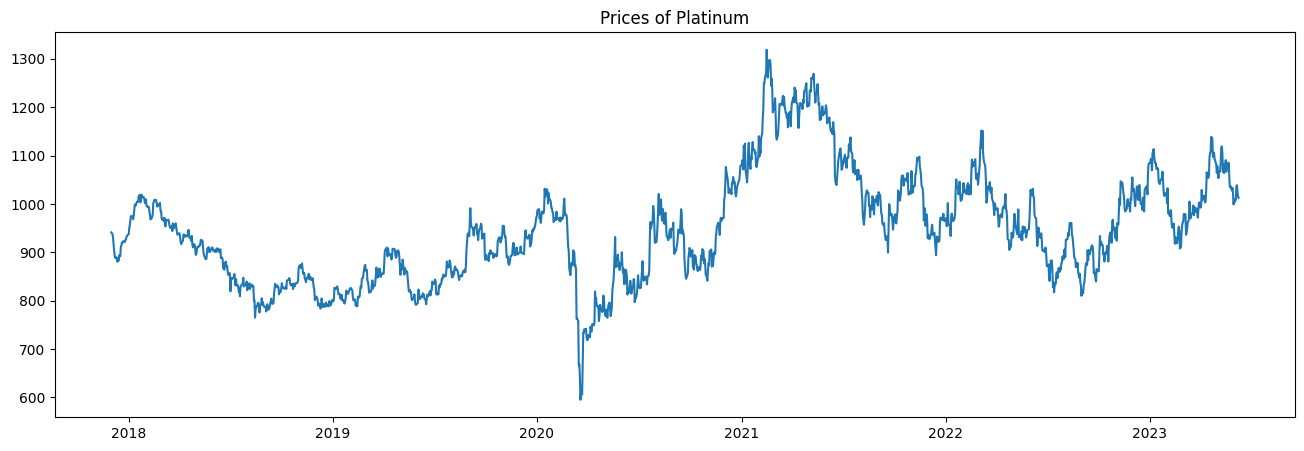

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Platinum')
plt.show()

# Split dataset (7-2-1)

---



In [ ]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.13037, saving model to save_model_7_2_1.hdf5
23/23 - 16s - loss: 0.1304 - 16s/epoch - 683ms/step
Epoch 2/80

Epoch 2: loss improved from 0.13037 to 0.05190, saving model to save_model_7_2_1.hdf5
23/23 - 7s - loss: 0.0519 - 7s/epoch - 320ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05190 to 0.03869, saving model to save_model_7_2_1.hdf5
23/23 - 7s - loss: 0.0387 - 7s/epoch - 324ms/step
Epoch 4/80

Epoch 4: loss improved from 0.03869 to 0.03760, saving model to save_model_7_2_1.hdf5
23/23 - 4s - loss: 0.0376 - 4s/epoch - 168ms/step
Epoch 5/80

Epoch 5: loss did not improve from 0.03760
23/23 - 5s - loss: 0.0411 - 5s/epoch - 204ms/step
Epoch 6/80

Epoch 6: loss did not improve from 0.03760
23/23 - 4s - loss: 0.0397 - 4s/epoch - 153ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03760 to 0.03678, saving model to save_model_7_2_1.hdf5
23/23 - 3s - loss: 0.0368 - 3s/epoch - 141ms/step
Epoch 8/80

Epoch 8: loss improved from 0.03678 to 0

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7_2_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

35/35 [==============================] - 3s 56ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

11/11 [==============================] - 1s 56ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

6/6 [==============================] - 0s 33ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.5033515306475019, 0.47543362587243465, 0.44585723170478875, 0.4641006150231498, 0.4508326998825237, 0.4468937875751503, 0.46133646603551937, 0.4842097989081612, 0.49450625388708447, 0.483726072835326, 0.4317600718678737, 0.43680464377029915, 0.4791652270057355, 0.49796144012162247, 0.5066685094326583, 0.5086034137239998, 0.5309930205238061, 0.5286434938843204, 0.5298873609287541, 0.4714256098403703, 0.4773685301637759, 0.48939257825996807, 0.5072213392301846, 0.5133715707276622, 0.5662359201160941, 0.5557321539630985, 0.5184161426300876, 0.5278142491880312, 0.5298873609287541, 0.5318222652200953, 0.5550411167161909, 0.5272614193905053, 0.5414967866768018, 0.5496510261903117, 0.5372123557459746, 0.5465413585792275, 0.5352774514546333, 0.5206274618201922, 0.5394236749360791, 0.5627807338815561, 0.563748186027227, 0.5489599889434039, 0.5544882869186648, 0.5995439154170409, 0.5696911063506324, 0.5826826065924952, 0.5826135028678047, 0.5634717711284637, 0.5665123350148574, 0.597

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5631024241447449], [0.5501110553741455], [0.5373033285140991], [0.5256108641624451], [0.5150378346443176], [0.5054238438606262], [0.49651190638542175], [0.4880311191082001], [0.47974544763565063], [0.4714791774749756], [0.46312326192855835], [0.45463088154792786], [0.4460040330886841], [0.43727871775627136], [0.4285096228122711], [0.4197578430175781], [0.41108134388923645], [0.40252918004989624], [0.39413943886756897], [0.38593825697898865], [0.3779420852661133], [0.3701591193675995], [0.36259254813194275], [0.355242520570755], [0.3481076657772064], [0.34118661284446716], [0.33447858691215515], [0.3279835879802704], [0.32170233130455017], [0.3156358003616333]]


In [ ]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1002.63275899]
 [ 993.23285412]
 [ 983.96582335]
 [ 975.50574076]
 [ 967.85562526]
 [ 960.89942223]
 [ 954.45118987]
 [ 948.31491623]
 [ 942.31981864]
 [ 936.33875886]
 [ 930.29283617]
 [ 924.14817434]
 [ 917.90621814]
 [ 911.59301623]
 [ 905.24813759]
 [ 898.91578732]
 [ 892.63790637]
 [ 886.44998823]
 [ 880.37959099]
 [ 874.44562584]
 [ 868.65999579]
 [ 863.02863082]
 [ 857.5538382 ]
 [ 852.23572576]
 [ 847.07330157]
 [ 842.06557372]
 [ 837.21198156]
 [ 832.51252508]
 [ 827.96772182]
 [ 823.57828335]]


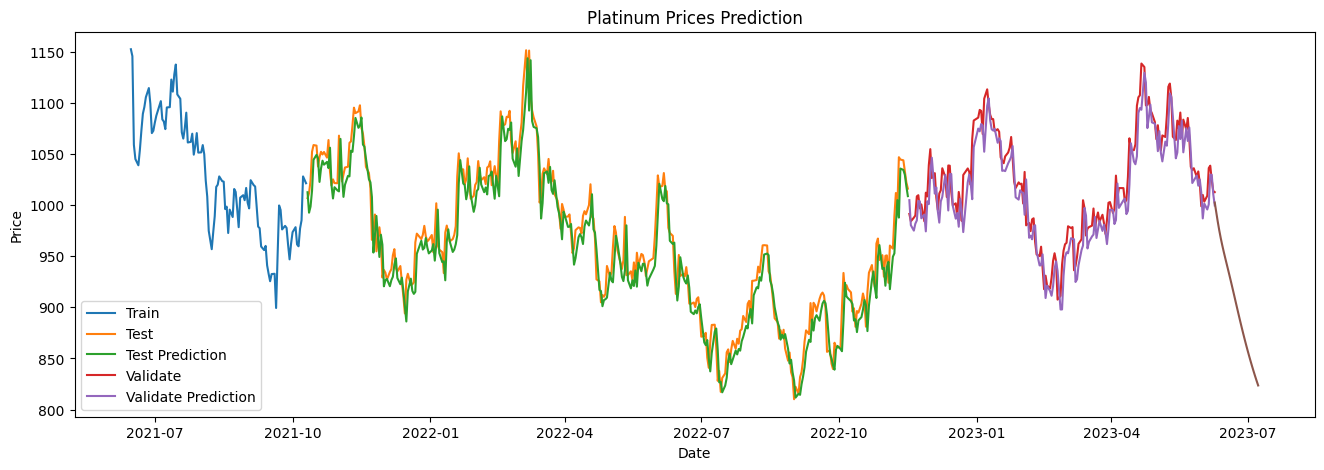

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.786365208750912
MAPE:  1.6294081630516093
RMSE:  19.959549491095533

** Validate **
MAE:  15.859206288949602
MAPE:  1.5475654399307324
RMSE:  20.041625781697288


# Split dataset (6-3-1)

---



In [ ]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.17575, saving model to save_model_6_3_1.hdf5
19/19 - 11s - loss: 0.1758 - 11s/epoch - 568ms/step
Epoch 2/80

Epoch 2: loss improved from 0.17575 to 0.06258, saving model to save_model_6_3_1.hdf5
19/19 - 3s - loss: 0.0626 - 3s/epoch - 144ms/step
Epoch 3/80

Epoch 3: loss improved from 0.06258 to 0.04771, saving model to save_model_6_3_1.hdf5
19/19 - 3s - loss: 0.0477 - 3s/epoch - 143ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04771 to 0.04307, saving model to save_model_6_3_1.hdf5
19/19 - 3s - loss: 0.0431 - 3s/epoch - 145ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04307 to 0.03881, saving model to save_model_6_3_1.hdf5
19/19 - 4s - loss: 0.0388 - 4s/epoch - 234ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03881 to 0.03671, saving model to save_model_6_3_1.hdf5
19/19 - 3s - loss: 0.0367 - 3s/epoch - 145ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03671 to 0.03570, saving model to save_model_6_3_1.hdf5
19/19 - 3s - los

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 [==============================] - 2s 38ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

17/17 [==============================] - 1s 38ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

6/6 [==============================] - 0s 37ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.5033515306475019, 0.47543362587243465, 0.44585723170478875, 0.4641006150231498, 0.4508326998825237, 0.4468937875751503, 0.46133646603551937, 0.4842097989081612, 0.49450625388708447, 0.483726072835326, 0.4317600718678737, 0.43680464377029915, 0.4791652270057355, 0.49796144012162247, 0.5066685094326583, 0.5086034137239998, 0.5309930205238061, 0.5286434938843204, 0.5298873609287541, 0.4714256098403703, 0.4773685301637759, 0.48939257825996807, 0.5072213392301846, 0.5133715707276622, 0.5662359201160941, 0.5557321539630985, 0.5184161426300876, 0.5278142491880312, 0.5298873609287541, 0.5318222652200953, 0.5550411167161909, 0.5272614193905053, 0.5414967866768018, 0.5496510261903117, 0.5372123557459746, 0.5465413585792275, 0.5352774514546333, 0.5206274618201922, 0.5394236749360791, 0.5627807338815561, 0.563748186027227, 0.5489599889434039, 0.5544882869186648, 0.5995439154170409, 0.5696911063506324, 0.5826826065924952, 0.5826135028678047, 0.5634717711284637, 0.5665123350148574, 0.597

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5824370980262756], [0.5891041159629822], [0.5957346558570862], [0.6022812128067017], [0.6089309453964233], [0.6157121658325195], [0.6226271390914917], [0.6296860575675964], [0.636911928653717], [0.6443397998809814], [0.6520114541053772], [0.6599681973457336], [0.6682413816452026], [0.6768483519554138], [0.6857916116714478], [0.6950578093528748], [0.7046223878860474], [0.7144515514373779], [0.7245066165924072], [0.7347460985183716], [0.7451276183128357], [0.7556093335151672], [0.7661503553390503], [0.7767118215560913], [0.787255048751831], [0.7977425456047058], [0.8081382513046265], [0.8184069395065308], [0.8285149335861206], [0.8384303450584412]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1016.62236228]
 [1021.44628311]
 [1026.24381025]
 [1030.98057153]
 [1035.79198554]
 [1040.69853759]
 [1045.70186649]
 [1050.80934695]
 [1056.03762598]
 [1061.4120622 ]
 [1066.96288762]
 [1072.71998919]
 [1078.70605169]
 [1084.93362506]
 [1091.40452062]
 [1098.10907796]
 [1105.02952875]
 [1112.14142004]
 [1119.41676244]
 [1126.82553958]
 [1134.33708823]
 [1141.92113326]
 [1149.54808961]
 [1157.18983849]
 [1164.81839052]
 [1172.40661887]
 [1179.92843173]
 [1187.35834108]
 [1194.6719802 ]
 [1201.84627617]]


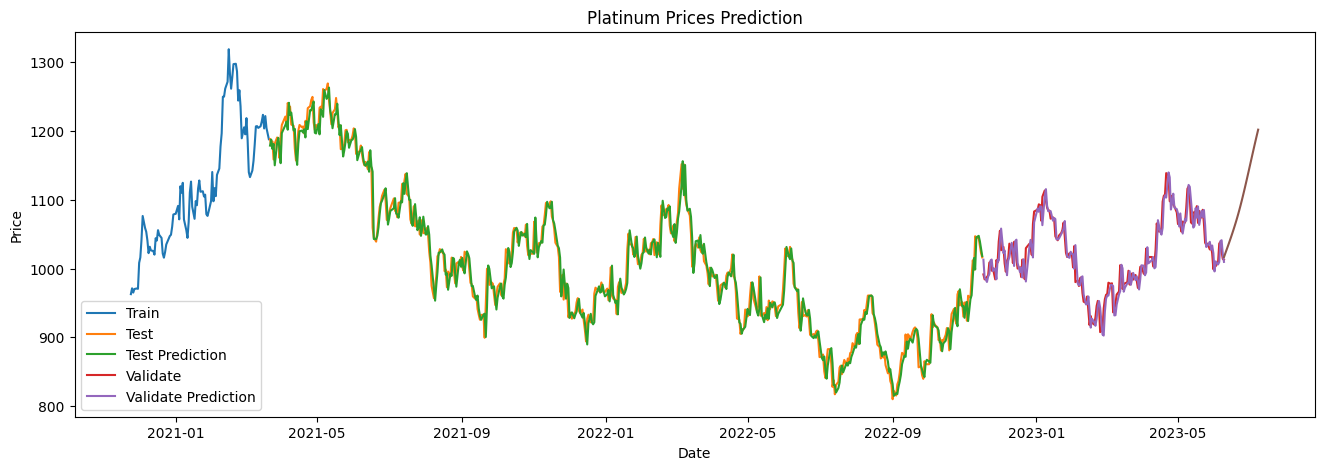

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.065596224590415
MAPE:  1.4029319353643623
RMSE:  18.230603779986307

** Validate **
MAE:  13.732219294729953
MAPE:  1.3455167692043402
RMSE:  17.718699577256295


# Split dataset (5-3-2)

---



In [ ]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.13234, saving model to save_model_5_3_2.hdf5
16/16 - 8s - loss: 0.1323 - 8s/epoch - 513ms/step
Epoch 2/80

Epoch 2: loss improved from 0.13234 to 0.05380, saving model to save_model_5_3_2.hdf5
16/16 - 3s - loss: 0.0538 - 3s/epoch - 192ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05380 to 0.04482, saving model to save_model_5_3_2.hdf5
16/16 - 3s - loss: 0.0448 - 3s/epoch - 215ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04482 to 0.04202, saving model to save_model_5_3_2.hdf5
16/16 - 2s - loss: 0.0420 - 2s/epoch - 149ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04202 to 0.04042, saving model to save_model_5_3_2.hdf5
16/16 - 2s - loss: 0.0404 - 2s/epoch - 152ms/step
Epoch 6/80

Epoch 6: loss improved from 0.04042 to 0.03843, saving model to save_model_5_3_2.hdf5
16/16 - 2s - loss: 0.0384 - 2s/epoch - 150ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03843 to 0.03485, saving model to save_model_5_3_2.hdf5
16/16 - 3s - loss:

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

24/24 [==============================] - 3s 38ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

17/17 [==============================] - 1s 38ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

11/11 [==============================] - 0s 38ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.5033515306475019, 0.47543362587243465, 0.44585723170478875, 0.4641006150231498, 0.4508326998825237, 0.4468937875751503, 0.46133646603551937, 0.4842097989081612, 0.49450625388708447, 0.483726072835326, 0.4317600718678737, 0.43680464377029915, 0.4791652270057355, 0.49796144012162247, 0.5066685094326583, 0.5086034137239998, 0.5309930205238061, 0.5286434938843204, 0.5298873609287541, 0.4714256098403703, 0.4773685301637759, 0.48939257825996807, 0.5072213392301846, 0.5133715707276622, 0.5662359201160941, 0.5557321539630985, 0.5184161426300876, 0.5278142491880312, 0.5298873609287541, 0.5318222652200953, 0.5550411167161909, 0.5272614193905053, 0.5414967866768018, 0.5496510261903117, 0.5372123557459746, 0.5465413585792275, 0.5352774514546333, 0.5206274618201922, 0.5394236749360791, 0.5627807338815561, 0.563748186027227, 0.5489599889434039, 0.5544882869186648, 0.5995439154170409, 0.5696911063506324, 0.5826826065924952, 0.5826135028678047, 0.5634717711284637, 0.5665123350148574, 0.597

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5643701553344727], [0.5480368137359619], [0.5347574949264526], [0.5234684944152832], [0.5144182443618774], [0.5072518587112427], [0.5014819502830505], [0.496559202671051], [0.4919646084308624], [0.4872693717479706], [0.4821677803993225], [0.4764837324619293], [0.47015777230262756], [0.4632202386856079], [0.4557594060897827], [0.4478910565376282], [0.43973222374916077], [0.4313831627368927], [0.4229167103767395], [0.41437599062919617], [0.40577682852745056], [0.39711394906044006], [0.3883696496486664], [0.379521906375885], [0.37055209279060364], [0.36145177483558655], [0.3522266745567322], [0.3429003059864044], [0.33351466059684753], [0.3241302967071533]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1003.55002589]
 [ 991.73203658]
 [ 982.12378545]
 [ 973.95562913]
 [ 967.40732071]
 [ 962.22208237]
 [ 958.04726513]
 [ 954.48541109]
 [ 951.16099243]
 [ 947.76375393]
 [ 944.07249751]
 [ 939.95980462]
 [ 935.38265615]
 [ 930.3630037 ]
 [ 924.96471828]
 [ 919.27157396]
 [ 913.36825049]
 [ 907.3272874 ]
 [ 901.20138579]
 [ 895.02174802]
 [ 888.79982428]
 [ 882.53179784]
 [ 876.20486   ]
 [ 869.80307536]
 [ 863.31296674]
 [ 856.72843168]
 [ 850.05361038]
 [ 843.3055164 ]
 [ 836.51453267]
 [ 829.72447618]]


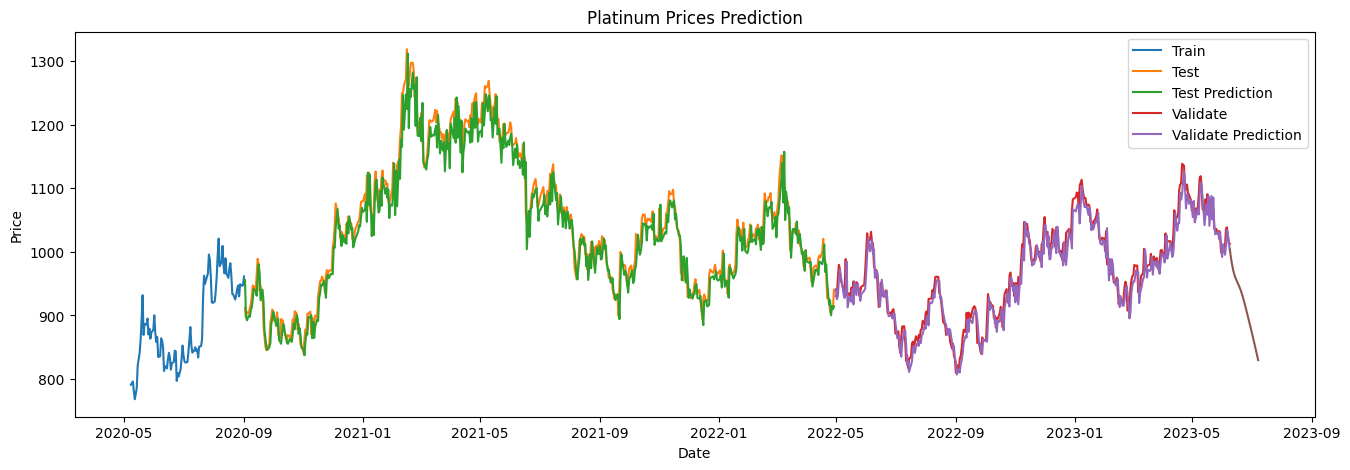

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  18.626819250606793
MAPE:  1.7476152550288084
RMSE:  24.401609341279336

** Validate **
MAE:  15.100230301258176
MAPE:  1.5547545555181097
RMSE:  19.393654724619836


# Evaluating model

---

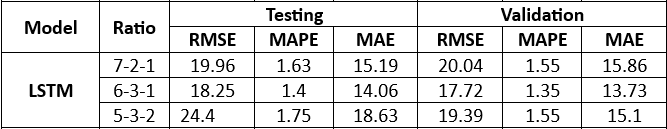